In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
f = open("iris.data", "r")

data = []

for line in f:
    try:
        items = line.strip().split(",")
        for i in range(4):
            items[i] = float(items[i])
        data.append((items[:4], items[4]))
    except:
        pass
print(data)

f.close()

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'), ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'), ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'), ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'), ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'), ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'), ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'), ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'), ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'), ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'), ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'), ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'), ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'), ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'), ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'), ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'), ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'), ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'), ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'), ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'), ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'), ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'), ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'), ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'), ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'), ([5.0, 3.0, 1.6, 0.2], '

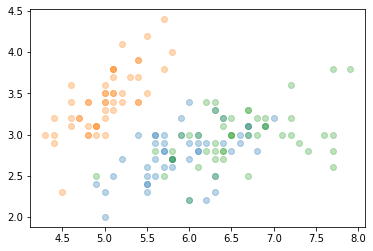

In [ ]:
classes = {y for x, y in data}

for c in classes:
    X0 = []
    X1 = []
    for x, y in data:
        if y == c:
            X0.append(x[0])
            X1.append(x[1])
    plt.scatter(X0, X1, alpha=0.3)
plt.show()

In [ ]:
import random

random.shuffle(data)
train = data[:-30]
test = data[-30:]

print(len(train), len(test))

120 30


In [ ]:
def distance(a, b):
    sum = 0
    for ai, bi in zip(a, b):
        sum += (bi-ai) ** 2
    return sum ** 0.5

In [ ]:
def knn(query, k, train):
    train_with_dist = []
    
    for t in train:
        d = distance(t[0], query)
        train_with_dist.append((d, t[1]))
    train_with_dist.sort()

    candidates = train_with_dist[:k]

    count_classes = {}

    for d, c in candidates:
        if c not in count_classes:
            count_classes[c] = 0
        count_classes[c] += 1/(1+d)
    
    return max(count_classes.items(), key=lambda x: x[1])[0]

In [ ]:
knn([7.0, 3.2, 4.7, 1.4], 10, train)

'Iris-versicolor'

100%|██████████| 30/30 [00:06<00:00,  4.99it/s]


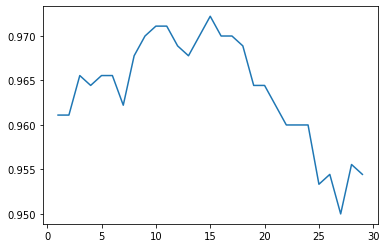

In [ ]:
from tqdm import tqdm

acc_avg = [0] * 30
n_trials = 30

for _ in tqdm(range(n_trials)):
    random.shuffle(data)
    train = data[:-30]
    test = data[-30:]

    for k in range(1, 30):
        correct_cnt = 0
        for t_v, t_c in test:
            if knn(t_v, k, train) == t_c:
                correct_cnt += 1
    
        total = len(test)
        accuracy = correct_cnt / total
        acc_avg[k] += accuracy

acc_avg = [a / n_trials for a in acc_avg]

plt.plot(range(1, 30), acc_avg[1:])
plt.show()